In [3]:
import pandas as pd
import os 

In [10]:
df = pd.read_csv('Protenus Sales Training Data.csv')

In [ ]:
#print first 5 rows
df.head(5)

In [ ]:
# Display the number of rows in the DataFrame
rows = df.shape[0]
print(f"The DataFrame has {rows} rows.")

In [ ]:
# Print specific row
specific_row = df.iloc[8000]
print(specific_row)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8844 entries, 0 to 8843
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Snapshot_Date                             8844 non-null   object 
 1   Opportunity_ID                            8844 non-null   object 
 2   Opportunity_Stage                         8844 non-null   object 
 3   Opportunity_Type                          8844 non-null   object 
 4   Opportunity_Annual_Amount                 7606 non-null   float64
 5   Opportunity_Created_Date                  8844 non-null   object 
 6   Opportunity_Close_Date                    8844 non-null   object 
 7   Opportunity_Product                       8844 non-null   object 
 8   Account_Electronic_Medical_Record_System  8844 non-null   object 
 9   Account_Hospital_Type                     8198 non-null   object 
 10  Account_Fiscal_Year_End             

In [12]:
df.Opportunity_Stage.unique()

array(['Stage 3 - Pricing', 'Stage 2 - Scoping', 'Stage 5 - Contracting',
       'Stage 4 - Verbal / VOC', 'Closed Lost', 'Closed Won',
       'Stage 1 - Evaluating', 'Stage 0 - Prospecting'], dtype=object)

In [13]:
df.Opportunity_Stage.eq("Closed Won").sum()

175

In [41]:
df["Opportunity_Close_Date"] = pd.to_datetime(df["Opportunity_Close_Date"])

In [42]:
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"])

In [73]:
df_won = df[df["Opportunity_Stage"] == "Closed Won"]

In [44]:
df_won.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 147 to 8815
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Snapshot_Date                             175 non-null    object        
 1   Opportunity_ID                            175 non-null    object        
 2   Opportunity_Stage                         175 non-null    object        
 3   Opportunity_Type                          175 non-null    object        
 4   Opportunity_Annual_Amount                 172 non-null    float64       
 5   Opportunity_Created_Date                  175 non-null    datetime64[ns]
 6   Opportunity_Close_Date                    175 non-null    datetime64[ns]
 7   Opportunity_Product                       175 non-null    object        
 8   Account_Electronic_Medical_Record_System  175 non-null    object        
 9   Account_Hospital_Type        

In [15]:
import pingouin as pg 

In [16]:
import missingno as msno 

In [25]:
model1 = pg.linear_regression(df_won[["Account_Number_of_Beds", "Account_Number_of_Hospitals ",
                                      "Account_Number_of_Affiliated_Physicians", "Account_Cash_on_Hand",
                                      "Account_Number_of_Employee", "Account_Total_Patient_Revenue",
                                      "Account_Net_Patient_Revenue"]], df_won["Opportunity_Annual_Amount"], remove_na=True)
model1
		

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,77013.807493,0.001780,4.326426e+07,0.000000e+00,0.703305,0.685402,77013.803967,77013.811019
1,Account_Number_of_Beds,8.834596,12.058447,7.326479e-01,4.652511e-01,0.703305,0.685402,-15.048678,32.717871
2,Account_Number_of_Hospitals,-159.384754,0.129277,-1.232892e+03,1.143255e-240,0.703305,0.685402,-159.640803,-159.128704
3,Account_Number_of_Affiliated_Physicians,24.306618,3.289347,7.389496e+00,2.464608e-11,0.703305,0.685402,17.791652,30.821584
4,Account_Cash_on_Hand,0.000037,0.000027,1.387378e+00,1.679861e-01,0.703305,0.685402,-0.000016,0.000090
5,Account_Number_of_Employee,14.735210,1.752748,8.406920e+00,1.228075e-13,0.703305,0.685402,11.263673,18.206748
6,Account_Total_Patient_Revenue,-0.000009,0.000004,-2.276593e+00,2.464441e-02,0.703305,0.685402,-0.000017,-0.000001
7,Account_Net_Patient_Revenue,0.000005,0.000016,2.922360e-01,7.706282e-01,0.703305,0.685402,-0.000027,0.000036


In [76]:
df_won.Opportunity_Annual_Amount.isna().sum()

3

In [75]:
df_won

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,Account_Fiscal_Year_End,Account_State,Account_Zip_Code,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue
147,11/1/19,0061K00000e2RhD,Closed Won,Existing Business,0.000000e+00,2019-09-09,2019-10-16,Privacy Monitoring,Epic,Critical Access Hospital,6/30/23,WY,83110.0,NaN,22.0,64.0,216.0,1.332023e+07,9.414469e+07,6.601294e+07
254,12/1/19,0064100000QeVGQ,Closed Won,New Business,2.425585e+05,2018-05-29,2019-11-22,Diversion Monitoring,Epic,Health System,NaN,IN,46845.0,14.0,1353.0,2090.0,5722.0,1.645544e+07,7.988593e+09,2.324875e+09
269,12/1/19,0061K00000eGZgs,Closed Won,Existing Business,2.196959e+04,2019-11-22,2019-11-22,Privacy Monitoring,Epic,Health System,NaN,IN,46845.0,14.0,1353.0,2090.0,495.0,1.645544e+07,7.988593e+09,2.324875e+09
308,12/1/19,0061K00000e1d9Y,Closed Won,New Business,2.354637e+05,2019-08-15,2019-11-29,Privacy Monitoring,Cerner,Health System,NaN,FL,33612.0,2.0,218.0,1208.0,2934.0,2.751000e+03,5.944508e+09,1.668301e+09
369,12/1/19,0061K00000chxwm,Closed Won,Existing Business,1.102048e+06,2019-03-29,2019-11-13,Privacy Monitoring,Epic,Health System,NaN,WA,98057.0,57.0,10435.0,17985.0,60139.0,2.277929e+09,6.783288e+10,1.776176e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8678,6/1/23,0061K00000c4njV,Closed Won,New Business,5.238039e+05,2019-03-01,2023-05-18,Diversion Monitoring,Epic,Health System,NaN,MO,63141.0,43.0,4816.0,6663.0,23378.0,1.592057e+08,2.118838e+10,6.505254e+09
8688,7/1/23,0061K00000lTTWt,Closed Won,Existing Business,7.400400e+04,2023-05-30,2023-06-12,Diversion Monitoring,Epic,Health System,NaN,IL,60611.0,12.0,2761.0,6676.0,3154.0,1.515223e+09,2.696792e+10,5.680457e+09
8721,7/1/23,0061K00000lRY1U,Closed Won,Existing Business,4.797415e+04,2023-03-13,2023-06-29,Diversion Monitoring,Epic,Health System,NaN,NJ,8053.0,5.0,1328.0,1681.0,7521.0,1.705302e+07,1.243416e+10,1.889101e+09
8811,7/1/23,0061K00000k1CB5,Closed Won,New Business,8.338494e+04,2022-04-28,2023-06-27,Diversion Monitoring,Epic,Health System,NaN,OH,45237.0,41.0,5906.0,10033.0,27533.0,4.647715e+08,4.248174e+10,8.826928e+09


In [77]:
df_won.Opportunity_Annual_Amount.isna().sum()

3

In [79]:
df_won['Quarter'] = df_won.Opportunity_Close_Date.dt.quarter

/var/folders/y_/yl_9n8_15wb0hgddp58sdxp80000gn/T/ipykernel_1079/2739579286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_won['Quarter'] = df_won.Opportunity_Close_Date.dt.quarter


In [86]:
df_won["year"] = df_won.Opportunity_Close_Date.dt.year

/var/folders/y_/yl_9n8_15wb0hgddp58sdxp80000gn/T/ipykernel_1079/2342000880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_won["year"] = df_won.Opportunity_Close_Date.dt.year


In [87]:
df_won.tail(10)

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,...,Account_Zip_Code,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue,Quarter,year
8605,6/1/23,0061K00000ks4PF,Closed Won,New Business,111906.9365,2022-11-21,2023-05-09,Privacy Monitoring,Epic,Health System,...,94602.0,4.0,331.0,536.0,2873.0,6.689658e+07,3.753330e+09,4.958856e+08,2,2023
8613,6/1/23,0061K00000kreSu,Closed Won,New Business,124601.5458,2022-11-09,2023-05-10,Diversion Monitoring,Epic,Short Term Acute Care Hospital,...,85712.0,2.0,499.0,968.0,3248.0,-4.849017e+06,2.895621e+09,7.473696e+08,2,2023
8617,6/1/23,0061K00000kqck4,Closed Won,New Business,236943.4167,2022-10-26,2023-05-23,Privacy Monitoring,Epic,Health System,...,40223.0,10.0,2235.0,5166.0,12044.0,1.227078e+07,2.052237e+10,3.302417e+09,2,2023
8649,6/1/23,0061K00000jV3Ou,Closed Won,New Business,426531.0922,2022-02-22,2023-05-24,Diversion Monitoring,Cerner,Health System,...,19406.0,181.0,21055.0,7653.0,45510.0,-4.500846e+07,7.105170e+10,1.034283e+10,2,2023
8673,6/1/23,0061K00000gUdpW,Closed Won,New Business,106601.6180,2020-11-05,2023-05-30,Privacy Monitoring,Other,NaN,...,NaN,NaN,NaN,NaN,3425.0,NaN,NaN,NaN,2,2023
8678,6/1/23,0061K00000c4njV,Closed Won,New Business,523803.9091,2019-03-01,2023-05-18,Diversion Monitoring,Epic,Health System,...,63141.0,43.0,4816.0,6663.0,23378.0,1.592057e+08,2.118838e+10,6.505254e+09,2,2023
8688,7/1/23,0061K00000lTTWt,Closed Won,Existing Business,74004.0000,2023-05-30,2023-06-12,Diversion Monitoring,Epic,Health System,...,60611.0,12.0,2761.0,6676.0,3154.0,1.515223e+09,2.696792e+10,5.680457e+09,2,2023
8721,7/1/23,0061K00000lRY1U,Closed Won,Existing Business,47974.1500,2023-03-13,2023-06-29,Diversion Monitoring,Epic,Health System,...,8053.0,5.0,1328.0,1681.0,7521.0,1.705302e+07,1.243416e+10,1.889101e+09,2,2023
8811,7/1/23,0061K00000k1CB5,Closed Won,New Business,83384.9400,2022-04-28,2023-06-27,Diversion Monitoring,Epic,Health System,...,45237.0,41.0,5906.0,10033.0,27533.0,4.647715e+08,4.248174e+10,8.826928e+09,2,2023
8815,7/1/23,0061K00000jWa9Q,Closed Won,Existing Business,60139.3100,2022-03-31,2023-06-09,Privacy Monitoring,Cerner,Childrens Hospital,...,90027.0,0.0,413.0,1014.0,5207.0,7.171567e+07,3.552585e+09,1.083588e+09,2,2023


In [88]:
df_won.to_csv('my_data.csv', index=False)

<Axes: xlabel='Quarter', ylabel='Opportunity_Annual_Amount'>

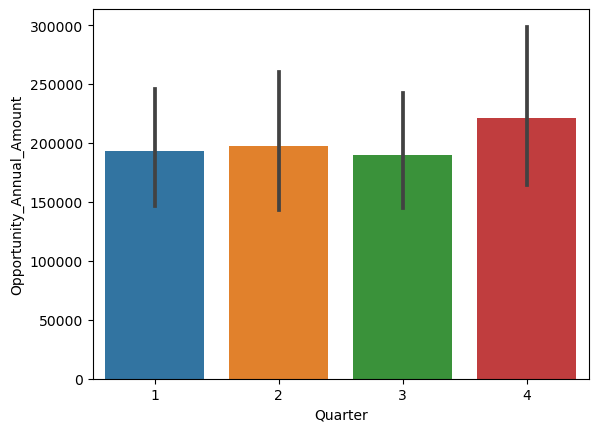

In [84]:
sns.barplot(data = df_won,
             x= "Quarter",
             y = "Opportunity_Annual_Amount")

In [82]:
import seaborn as sns 

<Axes: ylabel='Quarter'>

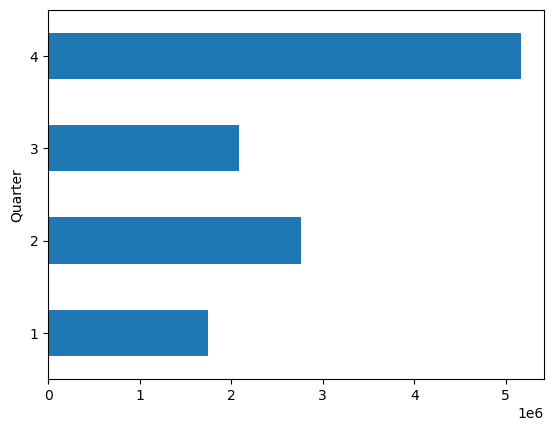

In [102]:
(df_won.groupby(by=["Quarter"]).Opportunity_Annual_Amount.sum()/3).plot.barh()

In [106]:
df["Opportunity_Stage"].unique()

array(['Stage 3 - Pricing', 'Stage 2 - Scoping', 'Stage 5 - Contracting',
       'Stage 4 - Verbal / VOC', 'Closed Lost', 'Closed Won',
       'Stage 1 - Evaluating', 'Stage 0 - Prospecting'], dtype=object)

In [125]:
df0 = df[df["Opportunity_Stage"] == "Stage 0 - Prospecting"]
df1 = df[df["Opportunity_Stage"] == "Stage 1 - Evaluating"]
df2 = df[df["Opportunity_Stage"] == "Stage 2 - Scoping"]
df3 = df[df["Opportunity_Stage"] == "Stage 3 - Pricing"]
df4 = df[df["Opportunity_Stage"] == "Stage 4 - Verbal / VOC"]
df5 = df[df["Opportunity_Stage"] == "Stage 5 - Contracting"]
df_lost = df[df["Opportunity_Stage"] == "Closed Lost"]

In [151]:
len(df3.Opportunity_ID.unique())

521

In [150]:
len(df_won.Opportunity_ID.unique())

175

In [228]:
set3 = set(df3.Opportunity_ID.unique())
set_won = set(df_won.Opportunity_ID.unique())

common3 = set3.intersection(set_won)
len(common3) 

136

In [229]:
len(common3)/len(df3.Opportunity_ID.unique())*100

26.103646833013432

In [161]:
df_won['Number_of_Days'] = df_won["Opportunity_Close_Date"] - df_won['Opportunity_Created_Date']

/var/folders/y_/yl_9n8_15wb0hgddp58sdxp80000gn/T/ipykernel_1079/3527168338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_won['Number_of_Days'] = df_won["Opportunity_Close_Date"] - df_won['Opportunity_Created_Date']


In [162]:
df_won

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,...,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue,Quarter,year,Number_of_Days
147,11/1/19,0061K00000e2RhD,Closed Won,Existing Business,0.000000e+00,2019-09-09,2019-10-16,Privacy Monitoring,Epic,Critical Access Hospital,...,NaN,22.0,64.0,216.0,1.332023e+07,9.414469e+07,6.601294e+07,4,2019,37 days
254,12/1/19,0064100000QeVGQ,Closed Won,New Business,2.425585e+05,2018-05-29,2019-11-22,Diversion Monitoring,Epic,Health System,...,14.0,1353.0,2090.0,5722.0,1.645544e+07,7.988593e+09,2.324875e+09,4,2019,542 days
269,12/1/19,0061K00000eGZgs,Closed Won,Existing Business,2.196959e+04,2019-11-22,2019-11-22,Privacy Monitoring,Epic,Health System,...,14.0,1353.0,2090.0,495.0,1.645544e+07,7.988593e+09,2.324875e+09,4,2019,0 days
308,12/1/19,0061K00000e1d9Y,Closed Won,New Business,2.354637e+05,2019-08-15,2019-11-29,Privacy Monitoring,Cerner,Health System,...,2.0,218.0,1208.0,2934.0,2.751000e+03,5.944508e+09,1.668301e+09,4,2019,106 days
369,12/1/19,0061K00000chxwm,Closed Won,Existing Business,1.102048e+06,2019-03-29,2019-11-13,Privacy Monitoring,Epic,Health System,...,57.0,10435.0,17985.0,60139.0,2.277929e+09,6.783288e+10,1.776176e+10,4,2019,229 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8678,6/1/23,0061K00000c4njV,Closed Won,New Business,5.238039e+05,2019-03-01,2023-05-18,Diversion Monitoring,Epic,Health System,...,43.0,4816.0,6663.0,23378.0,1.592057e+08,2.118838e+10,6.505254e+09,2,2023,1539 days
8688,7/1/23,0061K00000lTTWt,Closed Won,Existing Business,7.400400e+04,2023-05-30,2023-06-12,Diversion Monitoring,Epic,Health System,...,12.0,2761.0,6676.0,3154.0,1.515223e+09,2.696792e+10,5.680457e+09,2,2023,13 days
8721,7/1/23,0061K00000lRY1U,Closed Won,Existing Business,4.797415e+04,2023-03-13,2023-06-29,Diversion Monitoring,Epic,Health System,...,5.0,1328.0,1681.0,7521.0,1.705302e+07,1.243416e+10,1.889101e+09,2,2023,108 days
8811,7/1/23,0061K00000k1CB5,Closed Won,New Business,8.338494e+04,2022-04-28,2023-06-27,Diversion Monitoring,Epic,Health System,...,41.0,5906.0,10033.0,27533.0,4.647715e+08,4.248174e+10,8.826928e+09,2,2023,425 days


In [163]:
df_won.groupby(by=["Opportunity_Type"]).Number_of_Days.mean()

Opportunity_Type
Existing Business   305 days 06:15:39.130434784
New Business        356 days 12:27:54.418604652
Name: Number_of_Days, dtype: timedelta64[ns]

In [164]:
df_won.groupby(by=["Opportunity_Product"]).Number_of_Days.mean()

Opportunity_Product
Compliance Analytics   283 days 16:00:00
Diversion Monitoring   383 days 01:00:00
Privacy Monitoring     316 days 00:43:12
Name: Number_of_Days, dtype: timedelta64[ns]

In [230]:
df3_filtered = df3[df3["Opportunity_ID"].isin(common3)]

In [231]:
df3_filtered.Opportunity_ID.nunique()

136

In [235]:
df3_filtered['Number_of_days'] = df3_filtered['Opportunity_Close_Date'] - df3_filtered['Opportunity_Created_Date']

/var/folders/y_/yl_9n8_15wb0hgddp58sdxp80000gn/T/ipykernel_1079/3512717775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered['Number_of_days'] = df3_filtered['Opportunity_Close_Date'] - df3_filtered['Opportunity_Created_Date']


In [236]:
df3_filtered.drop_duplicates(subset="Opportunity_ID", keep="first",inplace=True)

/var/folders/y_/yl_9n8_15wb0hgddp58sdxp80000gn/T/ipykernel_1079/2344874689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered.drop_duplicates(subset="Opportunity_ID", keep="first",inplace=True)


In [237]:
df3_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1 to 8514
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype          
---  ------                                    --------------  -----          
 0   Snapshot_Date                             136 non-null    object         
 1   Opportunity_ID                            136 non-null    object         
 2   Opportunity_Stage                         136 non-null    object         
 3   Opportunity_Type                          136 non-null    object         
 4   Opportunity_Annual_Amount                 90 non-null     float64        
 5   Opportunity_Created_Date                  136 non-null    datetime64[ns] 
 6   Opportunity_Close_Date                    136 non-null    datetime64[ns] 
 7   Opportunity_Product                       136 non-null    object         
 8   Account_Electronic_Medical_Record_System  136 non-null    object         
 9   Account_Hospital_Typ

In [239]:
(df3_filtered.Number_of_days.lt(120).sum()/df3_filtered.shape[0])*100

14.705882352941178

In [245]:
print(f"{(df3_filtered.Number_of_days.between(120,180).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(180,240).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(240,300).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(300,360).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(360,420).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(420,480).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(480,540).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(600,660).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(840,900).sum()/df3_filtered.shape[0])*100}")
print(f"{(df3_filtered.Number_of_days.between(1100,1160).sum()/df3_filtered.shape[0])*100}")

22.794117647058822
19.11764705882353
13.23529411764706
8.088235294117647
11.76470588235294
2.2058823529411766
2.2058823529411766
2.2058823529411766
0.7352941176470588
0.0


In [223]:
df3_filtered

,Snapshot_Date,Opportunity_ID,Opportunity_Stage,Opportunity_Type,Opportunity_Annual_Amount,Opportunity_Created_Date,Opportunity_Close_Date,Opportunity_Product,Account_Electronic_Medical_Record_System,Account_Hospital_Type,...,Account_State,Account_Zip_Code,Account_Number_of_Hospitals,Account_Number_of_Beds,Account_Number_of_Affiliated_Physicians,Account_Number_of_Employee,Account_Cash_on_Hand,Account_Total_Patient_Revenue,Account_Net_Patient_Revenue,Number_of_days
1,10/1/19,0064100000TKWAx,Stage 3 - Pricing,New Business,NaN,2018-09-07,2019-12-12,Privacy Monitoring,Epic,Health System,...,HI,96813.0,4.0,602.0,1829.0,4443.0,-2.421880e+05,3.560499e+09,1.340713e+09,461.0
4,10/1/19,0064100000QhXXx,Stage 3 - Pricing,New Business,NaN,2018-06-26,2019-12-10,Privacy Monitoring,Epic,Health System,...,WI,53226.0,10.0,1259.0,2666.0,8197.0,2.076561e+07,1.024796e+10,3.881722e+09,532.0
7,10/1/19,0064100000QeVGQ,Stage 3 - Pricing,New Business,NaN,2018-05-29,2019-12-17,Diversion Monitoring,Epic,Health System,...,IN,46845.0,14.0,1353.0,2090.0,5722.0,1.645544e+07,7.988593e+09,2.324875e+09,567.0
24,10/1/19,0061K00000e2N1D,Stage 3 - Pricing,Existing Business,NaN,2019-09-05,2020-04-01,Privacy Monitoring,Epic,Health System,...,WA,98057.0,57.0,10435.0,17985.0,60139.0,2.277929e+09,6.783288e+10,1.776176e+10,209.0
33,10/1/19,0061K00000e1d9Y,Stage 3 - Pricing,New Business,NaN,2019-08-15,2019-12-13,Privacy Monitoring,Cerner,Health System,...,FL,33612.0,2.0,218.0,1208.0,2934.0,2.751000e+03,5.944508e+09,1.668301e+09,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,2/1/23,0061K00000lQmFq,Stage 3 - Pricing,Existing Business,0.0000,2023-01-25,2023-06-30,Privacy Monitoring,Epic,Health System,...,PA,19087.0,5.0,1179.0,2492.0,6152.0,5.221439e+07,8.084534e+09,1.617576e+09,156.0
8076,2/1/23,0061K00000ksUL4,Stage 3 - Pricing,New Business,122310.0000,2022-12-09,2023-03-31,Privacy Monitoring,Meditech,Health System,...,OH,45750.0,3.0,219.0,498.0,2611.0,9.311753e+06,1.780775e+09,5.659899e+08,112.0
8136,2/1/23,0061K00000jWa9Q,Stage 3 - Pricing,New Business,149490.0000,2022-03-31,2023-09-15,Privacy Monitoring,Cerner,Childrens Hospital,...,CA,90027.0,NaN,413.0,1014.0,5207.0,7.171567e+07,3.552585e+09,1.083588e+09,533.0
8194,3/1/23,0061K00000lQnLj,Stage 3 - Pricing,New Business,184993.3042,2023-01-26,2023-04-03,Diversion Monitoring,Epic,Health System,...,OH,45219.0,2.0,546.0,822.0,3627.0,3.800890e+07,3.155461e+09,8.919577e+08,67.0


In [238]:
# Assuming 'Num_of_Days' is the column with string values like "12 days"
df3_filtered['Number_of_days'] = df3_filtered['Number_of_days'].astype(int)/ (1e9 * 3600*24)

/var/folders/y_/yl_9n8_15wb0hgddp58sdxp80000gn/T/ipykernel_1079/2144005836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered['Number_of_days'] = df3_filtered['Number_of_days'].astype(int)/ (1e9 * 3600*24)
